# Bar Chart Animation

For this topic it use a dataset that contains emission data of Green House Gases (in tonnes) of different countries from year 1751 - 2017.
You can downloand the dataset [here](https://www.kaggle.com/srikantsahu/co2-and-ghg-emission-data).

The dataset contains 267 columns, which the first correspond to the countries and the rest to the year 1751 to 2017, and contains with 231 countries.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Import dataset and exploring

In [2]:
co2 = pd.read_csv('CO2_emission.csv')
co2.head()

,Country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,8.515264e+07,9.191295e+07,1.003652e+08,1.125912e+08,1.233332e+08,1.333337e+08,1.431228e+08,1.532303e+08,1.654882e+08,1.785029e+08
1,Africa,0,0,0,0,0,0,0,0,0,...,3.183077e+10,3.301904e+10,3.421283e+10,3.541120e+10,3.664504e+10,3.789569e+10,3.918617e+10,4.047518e+10,4.178583e+10,4.311757e+10
2,Albania,0,0,0,0,0,0,0,0,0,...,2.287948e+08,2.331696e+08,2.377643e+08,2.430001e+08,2.479062e+08,2.529662e+08,2.586784e+08,2.646261e+08,2.708990e+08,2.772782e+08
3,Algeria,0,0,0,0,0,0,0,0,0,...,2.894820e+09,3.015005e+09,3.132819e+09,3.252626e+09,3.380736e+09,3.513171e+09,3.656348e+09,3.806940e+09,3.957319e+09,4.107870e+09
4,Americas (other),0,0,0,0,0,0,0,0,0,...,7.746025e+10,7.961787e+10,8.187178e+10,8.416656e+10,8.654197e+10,8.894874e+10,9.139192e+10,9.382747e+10,9.624253e+10,9.864116e+10


In [3]:
co2.tail()

,Country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
226,Wallis and Futuna Islands,0,0,0,0,0,0,0,0,0,...,2.015200e+05,2.308320e+05,2.601440e+05,2.857920e+05,3.114400e+05,3.334240e+05,3.554080e+05,3.793990e+05,4.036640e+05,4.295730e+05
227,World,9350528,18704720,28058912,37416768,46778288,56784672,66794720,76808432,86825808,...,1.260000e+12,1.290000e+12,1.330000e+12,1.360000e+12,1.400000e+12,1.430000e+12,1.470000e+12,1.500000e+12,1.540000e+12,1.580000e+12
228,Yemen,0,0,0,0,0,0,0,0,0,...,4.285533e+08,4.528009e+08,4.759527e+08,4.954658e+08,5.137040e+08,5.386844e+08,5.609470e+08,5.813316e+08,6.004670e+08,6.194328e+08
229,Zambia,0,0,0,0,0,0,0,0,0,...,1.543919e+08,1.567982e+08,1.593608e+08,1.621534e+08,1.656340e+08,1.693902e+08,1.736459e+08,1.780473e+08,1.826225e+08,1.873686e+08
230,Zimbabwe,0,0,0,0,0,0,0,0,0,...,6.170923e+08,6.226118e+08,6.302928e+08,6.397327e+08,6.473473e+08,6.588835e+08,6.707499e+08,6.816575e+08,6.915901e+08,7.019879e+08


In [4]:
print('It comfirm that there is:',co2.index.unique().shape[0],'countries')

It comfirm that there is: 231 countries


## Transforming the Data

We must use [wide data format](https://en.wikipedia.org/wiki/Wide_and_narrow_data) for can do the animation bar chart.

For transform the data use df.pivot() method:

In [5]:
co2.rename(columns={'Country':'Year'},inplace=True)
co2 = co2.transpose()

In [6]:
co2.to_csv('wide_data_co2.csv',header=None)

Import the wide data to a dataframe:

In [7]:
co2wide = pd.read_csv('wide_data_co2.csv')
co2wide

,Year,Afghanistan,Africa,Albania,Algeria,Americas (other),Andorra,Angola,Anguilla,Antarctic Fisheries,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna Islands,World,Yemen,Zambia,Zimbabwe
0,1751,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,9.350528e+06,0.0,0.0,0.0
1,1752,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,1.870472e+07,0.0,0.0,0.0
2,1753,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,2.805891e+07,0.0,0.0,0.0
3,1754,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,3.741677e+07,0.0,0.0,0.0
4,1755,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,4.677829e+07,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2013,133333663.0,3.789569e+10,252966224.0,3.513171e+09,8.894874e+10,11746784.0,483802609.0,2443888.0,153888.0,...,326159965.0,5.622211e+09,3642016.0,6.884396e+09,2.275257e+09,333424.0,1.430000e+12,538684418.0,169390168.0,658883535.0
263,2014,143122849.0,3.918617e+10,258678400.0,3.656348e+09,9.139192e+10,12208448.0,518260251.0,2586784.0,153888.0,...,332816072.0,5.726692e+09,3795904.0,7.068632e+09,2.434969e+09,355408.0,1.470000e+12,560946988.0,173645895.0,670749884.0
264,2015,153230277.0,4.047518e+10,264626124.0,3.806940e+09,9.382747e+10,12685687.0,553021380.0,2735961.0,153888.0,...,339467178.0,5.837362e+09,3963838.0,7.245529e+09,2.619471e+09,379399.0,1.500000e+12,581331585.0,178047308.0,681657488.0
265,2016,165488185.0,4.178583e+10,270898982.0,3.957319e+09,9.624253e+10,13197193.0,588372383.0,2888033.0,153888.0,...,346231602.0,5.935287e+09,4133697.0,7.411626e+09,2.817273e+09,403664.0,1.540000e+12,600467008.0,182622452.0,691590138.0


## Expanding dataframe

In [8]:
co2wide.index = co2wide.index *10
co2wide

,Year,Afghanistan,Africa,Albania,Algeria,Americas (other),Andorra,Angola,Anguilla,Antarctic Fisheries,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna Islands,World,Yemen,Zambia,Zimbabwe
0,1751,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,9.350528e+06,0.0,0.0,0.0
10,1752,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,1.870472e+07,0.0,0.0,0.0
20,1753,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,2.805891e+07,0.0,0.0,0.0
30,1754,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,3.741677e+07,0.0,0.0,0.0
40,1755,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,4.677829e+07,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,2013,133333663.0,3.789569e+10,252966224.0,3.513171e+09,8.894874e+10,11746784.0,483802609.0,2443888.0,153888.0,...,326159965.0,5.622211e+09,3642016.0,6.884396e+09,2.275257e+09,333424.0,1.430000e+12,538684418.0,169390168.0,658883535.0
2630,2014,143122849.0,3.918617e+10,258678400.0,3.656348e+09,9.139192e+10,12208448.0,518260251.0,2586784.0,153888.0,...,332816072.0,5.726692e+09,3795904.0,7.068632e+09,2.434969e+09,355408.0,1.470000e+12,560946988.0,173645895.0,670749884.0
2640,2015,153230277.0,4.047518e+10,264626124.0,3.806940e+09,9.382747e+10,12685687.0,553021380.0,2735961.0,153888.0,...,339467178.0,5.837362e+09,3963838.0,7.245529e+09,2.619471e+09,379399.0,1.500000e+12,581331585.0,178047308.0,681657488.0
2650,2016,165488185.0,4.178583e+10,270898982.0,3.957319e+09,9.624253e+10,13197193.0,588372383.0,2888033.0,153888.0,...,346231602.0,5.935287e+09,4133697.0,7.411626e+09,2.817273e+09,403664.0,1.540000e+12,600467008.0,182622452.0,691590138.0


In [9]:
last_idx = co2wide.index[-1] + 1
co2wide = co2wide.reindex(range(last_idx),copy=True)
co2wide

,Year,Afghanistan,Africa,Albania,Algeria,Americas (other),Andorra,Angola,Anguilla,Antarctic Fisheries,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna Islands,World,Yemen,Zambia,Zimbabwe
0,1751.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,9.350528e+06,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
co2wide['Year'] = co2wide['Year'].fillna(method='ffill')
co2wide

,Year,Afghanistan,Africa,Albania,Algeria,Americas (other),Andorra,Angola,Anguilla,Antarctic Fisheries,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna Islands,World,Yemen,Zambia,Zimbabwe
0,1751.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,9.350528e+06,0.0,0.0,0.0
1,1751.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1751.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1751.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1751.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2657,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2658,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2659,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Set Year as Index and create co2 Rank

In [11]:
co2wide.set_index('Year',drop=True,inplace=True)
co2_rank = co2wide.rank(axis=1,method='first')

## Interpolate CO2 and CO2 Rank, **Replace NaN by zero:**

In [12]:
co2wide = co2wide.interpolate()
co2_rank = co2_rank.interpolate()

co2wide = co2wide.replace(np.nan,0)
co2_rank = co2_rank.replace(np.nan,0)

In [13]:
co2wide

,Afghanistan,Africa,Albania,Algeria,Americas (other),Andorra,Angola,Anguilla,Antarctic Fisheries,Antigua and Barbuda,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna Islands,World,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1751.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,9.350528e+06,0.0,0.0,0.0
1751.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,1.028595e+07,0.0,0.0,0.0
1751.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,1.122137e+07,0.0,0.0,0.0
1751.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,1.215679e+07,0.0,0.0,0.0
1751.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,1.309220e+07,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016.0,173297029.0,4.258488e+10,274726506.2,4.047649e+09,9.768171e+10,13509303.4,609606339.8,2979260.0,153888.0,21530598.6,...,350335806.0,5.994686e+09,4242514.8,7.507366e+09,2.936569e+09,419209.4,1.564000e+12,611846461.0,185470140.8,697828768.8
2016.0,174598503.0,4.271805e+10,275364426.9,4.062704e+09,9.792157e+10,13561321.8,613145332.6,2994464.5,153888.0,21587128.2,...,351019840.0,6.004586e+09,4260651.1,7.523323e+09,2.956451e+09,421800.3,1.568000e+12,613743036.5,185944755.6,698868540.6
2016.0,175899977.0,4.285123e+10,276002347.6,4.077760e+09,9.816143e+10,13613340.2,616684325.4,3009669.0,153888.0,21643657.8,...,351703874.0,6.014486e+09,4278787.4,7.539280e+09,2.976334e+09,424391.2,1.572000e+12,615639612.0,186419370.4,699908312.4


In [14]:


co2_rank

,Afghanistan,Africa,Albania,Algeria,Americas (other),Andorra,Angola,Anguilla,Antarctic Fisheries,Antigua and Barbuda,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna Islands,World,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1751.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,220.0,221.0,222.0,223.0,224.0,225.0,231.0,226.0,227.0,228.0
1751.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,220.0,221.0,222.0,223.0,224.0,225.0,231.0,226.0,227.0,228.0
1751.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,220.0,221.0,222.0,223.0,224.0,225.0,231.0,226.0,227.0,228.0
1751.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,220.0,221.0,222.0,223.0,224.0,225.0,231.0,226.0,227.0,228.0
1751.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,220.0,221.0,222.0,223.0,224.0,225.0,231.0,226.0,227.0,228.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016.0,101.6,218.0,117.0,183.0,224.0,39.4,135.8,14.0,2.0,49.6,...,122.4,192.0,21.0,194.0,173.2,6.0,231.0,136.0,105.0,140.0
2016.0,101.7,218.0,117.0,183.0,224.0,39.3,136.1,14.0,2.0,49.7,...,122.3,192.0,21.0,194.0,173.4,6.0,231.0,136.0,105.0,140.0
2016.0,101.8,218.0,117.0,183.0,224.0,39.2,136.4,14.0,2.0,49.8,...,122.2,192.0,21.0,194.0,173.6,6.0,231.0,136.0,105.0,140.0


## First Plot

In [93]:
#Color map and color selected
import random

color_blind = [(0/255,107/255,164/255),
               (255/255,128/255,14/255),
               (171/255,171/255,171/255),
               (89/255,89/255,89/255),
               (95/255,158/255,209/255),
               (200/255,82/255,0/255),
               (137/255,137/255,137/255),
               (162/255,200/255,236/255),
               (255/255,188/255,121/255),
               (207/255,207/255,207/255)]

def color(color_list):
    colors = []
    for i in range(0,10):
        colors.append(random.choice(color_blind))
    return colors
    
# colors = plt.cm.Dark2(range(3))

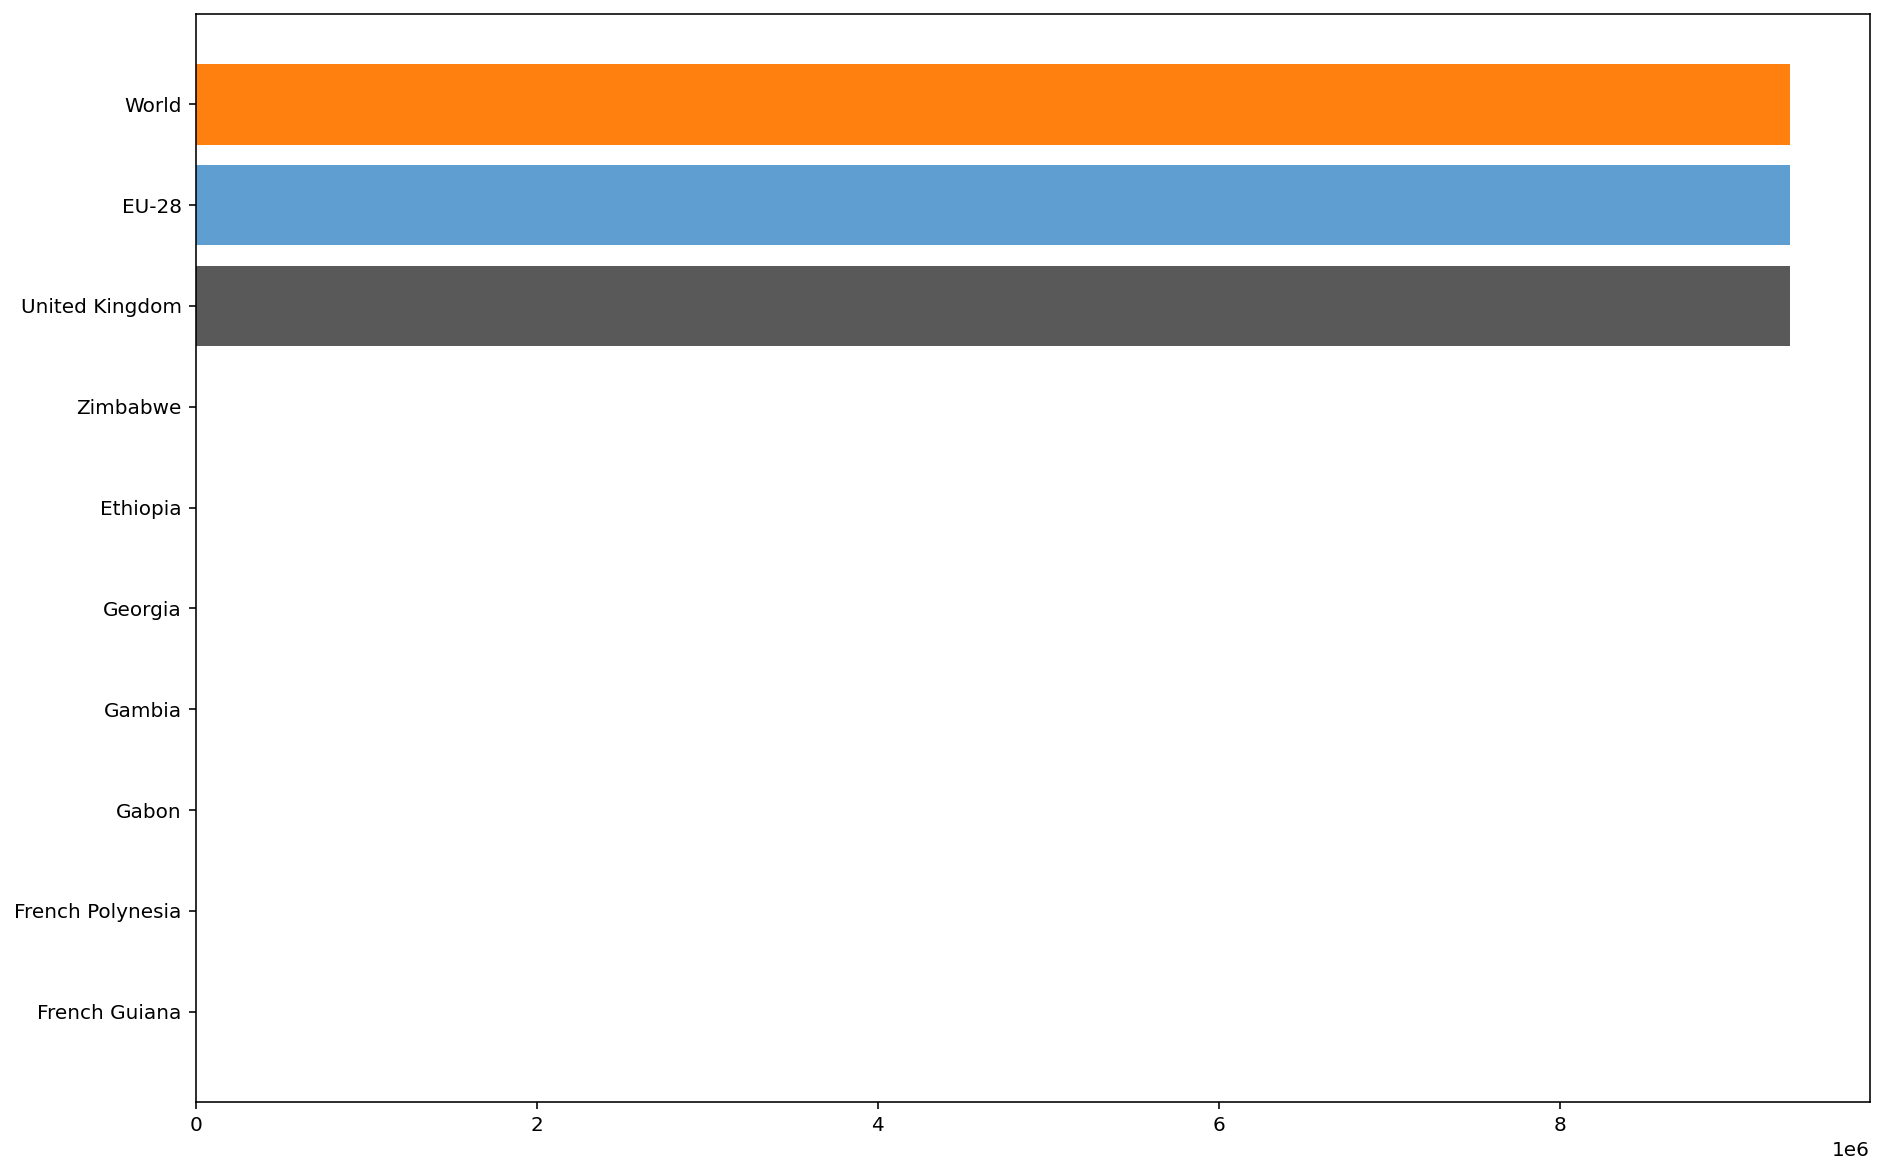

In [96]:
#Top 10
df = co2wide.iloc[0,:]
df=df.sort_values(ascending = True)
df_rank = df.rank(method='first')

#plot
fig, ax = plt.subplots(figsize=(15, 10), dpi=144)
y = df_rank.tail(10).index
width = df.tail(10).values
bar = ax.barh(y=y, width=width, color=color(color_blind))